Business challenge/requirement  :
Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries. It provides battery on a rental model to e-vehicle drivers. 
Drivers rent battery typically for a day and then replace it with a charged battery from the company.
Lithionpower has a variable pricing model based on driver's driving history. 
As the life of a battery depends on factors such as overspeeding, distance driven per day etc.
You as a ML expert have to create a cluster model where drivers can be grouped together based on the driving data.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.colors import ListedColormap
%matplotlib inline

# Load Data

In [108]:
df=pd.read_csv('c:\edureka\driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


# Explore Data

In [109]:
df.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.8 KB


In [111]:
df["mean_over_speed_perc"]= df["mean_over_speed_perc"].astype(float) 

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 93.8 KB


In [113]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [114]:
df.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

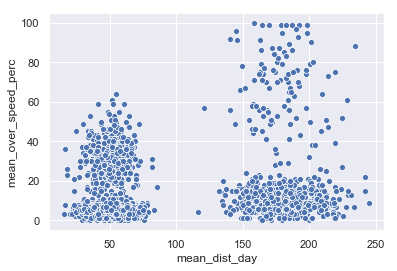

In [115]:
ax = sns.scatterplot(x="mean_dist_day", y="mean_over_speed_perc",data=df)

# Create a k means clustering

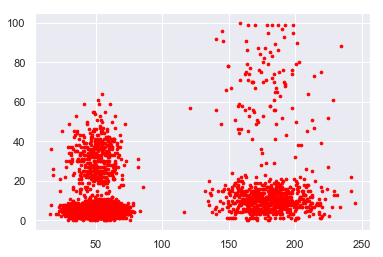

In [117]:
x=df['mean_dist_day'].values
y=df['mean_over_speed_perc'].values
X = np.array(list(zip(x, y)))
plt.scatter(x, y, c='red', s=7)

In [118]:
print(X)

[[ 71.24  28.  ]
 [ 52.53  25.  ]
 [ 64.54  27.  ]
 ...
 [170.91  12.  ]
 [176.14   5.  ]
 [168.03   9.  ]]


# Setting k=2

In [119]:
kmeans = KMeans(n_clusters=2)

In [120]:
kmeans = kmeans.fit(X)


In [121]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [122]:
labels = kmeans.predict(X)


In [123]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [124]:
C =kmeans.cluster_centers_
C

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

# Plotting for 2 clusters

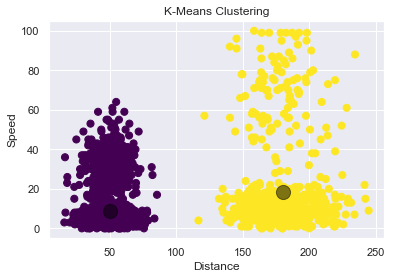

In [125]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('K-Means Clustering')
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.show()

# Setting Cluster=4

In [126]:
kmeans = KMeans(n_clusters=4).fit(X)

In [127]:
labels = kmeans.predict(X)
labels

array([2, 2, 2, ..., 1, 1, 1])

In [128]:
C =kmeans.cluster_centers_
C

array([[ 49.99263253,   5.20447169],
       [180.34311782,  10.52011494],
       [ 50.40482436,  32.36533958],
       [177.83509615,  70.28846154]])

# plotiing for 4 clusters

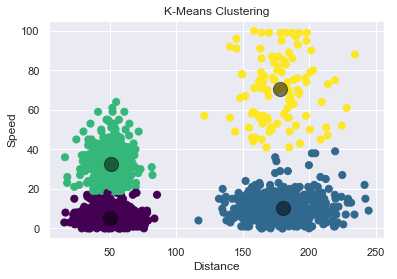

In [129]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('K-Means Clustering')
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.show()